# 主成分分析 PrincipalComponentAnalysis

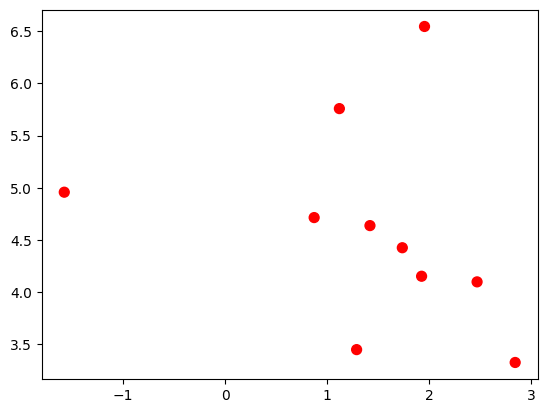

In [1]:
# data generation
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=10, centers=1, random_state=0, cluster_std=1.00)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

In [3]:
from sklearn.datasets import make_blobs  # 数据生成 / Data generation
from sklearn.decomposition import PCA  # PCA模块 / PCA module
import matplotlib.pyplot as plt  # 绘图库 / Plotting library
import numpy as np  # 数学库 / Mathematics library

# 创建PCA对象 / Create PCA object
pca = PCA(n_components=2)  # 设置主成分数量 / Set the number of principal components
pca.fit(X)  # 拟合数据 / Fit the data

# 获取特征值和特征向量 / Get eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_  # 特征值 / Eigenvalues
eigenvectors = pca.components_  # 特征向量 / Eigenvectors

# 输出结果 / Print results
print("Eigenvectors / 特征向量:\n", eigenvectors)
print("Eigenvalues / 特征值:", eigenvalues)

Eigenvectors / 特征向量:
 [[-0.89685308  0.44232855]
 [ 0.44232855  0.89685308]]
Eigenvalues / 特征值: [1.62154043 0.8062431 ]


In [6]:
# 创建PCA对象，降到1维 / Create PCA object and reduce to 1D
pca = PCA(n_components=1)  # 设置主成分数量为1 / Set number of principal components to 1
X_pca = pca.fit_transform(X)  # 拟合并转换数据 / Fit and transform the data

# 打印映射前后的坐标值 / Print original and projected coordinates
for i in range(len(X_pca)):
    print(f"Coordinates:{X[i]} -> {X_pca[i]}")

Coordinates:[1.7373078  4.42546234] -> [-0.37729262]
Coordinates:[2.84382807 3.32650945] -> [-1.85577697]
Coordinates:[-1.57671974  4.95740592] -> [2.83019703]
Coordinates:[1.42013331 4.63746165] -> [0.00093965]
Coordinates:[1.95500806 6.54468053] -> [0.36485294]
Coordinates:[1.28933778 3.44969159] -> [-0.40714058]
Coordinates:[1.12031365 5.75806083] -> [0.76550685]
Coordinates:[2.47034915 4.09862906] -> [-1.1792907]
Coordinates:[1.9263585  4.15243012] -> [-0.66761326]
Coordinates:[0.87305123 4.71438583] -> [0.52561766]


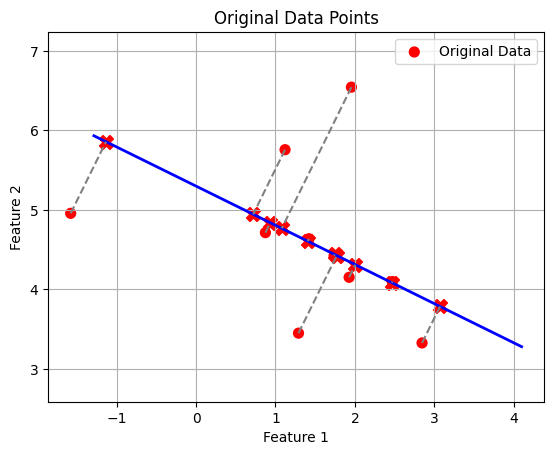

In [22]:
# 可视化原始数据 / Visualize the original data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', label='Original Data')
plt.title('Original Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# 绘制新坐标轴 / Plot new axis
origin = np.mean(X, axis=0)  # 坐标轴起点 / Origin point
length = 3  # 设置线的长度 / Set the length of the line

# 绘制前后都有的线段 / Draw line in both directions
plt.plot([origin[0] - length * new_axis[0, 0], origin[0] + length * new_axis[0, 0]],
         [origin[1] - length * new_axis[1, 0], origin[1] + length * new_axis[1, 0]], 
         color='blue', linewidth=2)  # 线段 / Line segment

# 绘制投影线和投影点 / Draw projection lines and projection points
for i in range(X.shape[0]):
    # 原始点到新坐标轴的投影 / Projection of original points onto the new axis
    proj = np.dot(X[i] - origin, new_axis[:, 0]) * new_axis[:, 0] + origin
    plt.plot([X[i, 0], proj[0]], [X[i, 1], proj[1]], color='gray', linestyle='--')  # 投影线 / Projection line
    plt.scatter(proj[0], proj[1], color='red', marker='X', s=100)  # 投影点 / Projection point

# 显示图例 / Show legend
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()